# Exploratory Data Analysis, Linear Regression, and Time Series Modeling with COVID19 Worldwide Aggregated Data. 

In [1]:
# first step get data
!wget https://raw.githubusercontent.com/datasets/covid-19/master/data/worldwide-aggregated.csv

--2020-04-04 22:48:18--  https://raw.githubusercontent.com/datasets/covid-19/master/data/worldwide-aggregated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.36.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.36.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3510 (3.4K) [text/plain]
Saving to: ‘worldwide-aggregated.csv’

worldwide-aggregate 100%[===================>]   3.43K  --.-KB/s    in 0s      

2020-04-04 22:48:19 (15.7 MB/s) - ‘worldwide-aggregated.csv’ saved [3510/3510]



In [2]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# open csv file 
covid_data = pd.read_csv('worldwide-aggregated.csv')
# get shape of data
covid_data.shape

(74, 5)

In [4]:
# get info about dataframe
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 5 columns):
Date             74 non-null object
Confirmed        74 non-null int64
Recovered        74 non-null int64
Deaths           74 non-null int64
Increase rate    73 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.0+ KB


In [5]:
# check out the head of the data
covid_data.head()

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,555,28,17,NaN
1,2020-01-23,654,30,18,17.837838
2,2020-01-24,941,36,26,43.883792
3,2020-01-25,1434,39,42,52.391073
4,2020-01-26,2118,52,56,47.698745


In [6]:
# check out the tail
covid_data.tail()

,Date,Confirmed,Recovered,Deaths,Increase rate
69,2020-03-31,857487,178034,42107,9.601912
70,2020-04-01,932605,193177,46809,8.760249
71,2020-04-02,1013157,210263,52983,8.637312
72,2020-04-03,1095917,225796,58787,8.168527
73,2020-04-04,1197405,246152,64606,9.260555


In [7]:
# fill in missing values
covid_data = covid_data.fillna(0)
covid_data[:5]

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,555,28,17,0.000000
1,2020-01-23,654,30,18,17.837838
2,2020-01-24,941,36,26,43.883792
3,2020-01-25,1434,39,42,52.391073
4,2020-01-26,2118,52,56,47.698745


In [8]:
# get descriptive stats on the data
covid_data.describe()

,Confirmed,Recovered,Deaths,Increase rate
count,7.400000e+01,74.000000,74.000000,74.000000
mean,2.005873e+05,53555.608108,8880.837838,11.716230
std,2.819855e+05,60180.301221,14626.410630,14.719870
min,5.550000e+02,28.000000,17.000000,0.000000
25%,4.080300e+04,3419.500000,932.750000,2.818456
50%,8.342900e+04,34994.000000,2843.000000,8.492026
75%,1.932200e+05,80152.000000,7710.250000,12.141574
max,1.197405e+06,246152.000000,64606.000000,90.570550


In [9]:
# set date to index
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data = covid_data.set_index('Date')

Text(0, 0.5, 'Deaths')

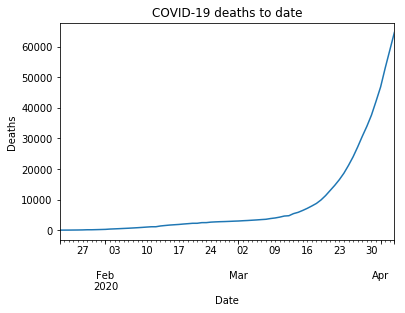

In [10]:
# real quick, let's do a line plot of deaths over time
covid_data['Deaths'].plot.line()
plt.title('COVID-19 deaths to date')
plt.ylabel('Deaths')

Text(0, 0.5, '% of recovered patients')

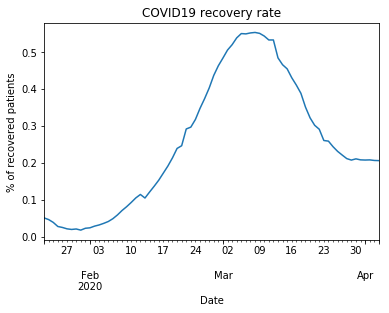

In [11]:
# calculate recovery Rate
(covid_data['Recovered'] / covid_data['Confirmed']).plot.line()
plt.title("COVID19 recovery rate")
plt.ylabel('% of recovered patients')

Text(0.5, 1.0, 'Aggregated worldwide COVID-19 mortality rate')

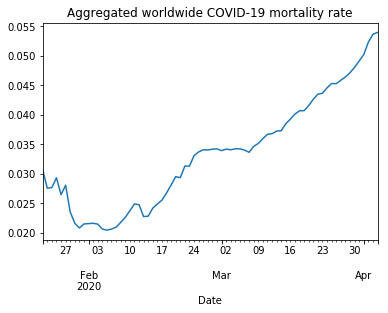

In [12]:
# calculate mortality rate
(covid_data['Deaths'] / covid_data['Confirmed']).plot.line()
plt.title("Aggregated worldwide COVID-19 mortality rate")

Text(0.5, 1.0, 'Increase in COVID-19 cases worldwide')

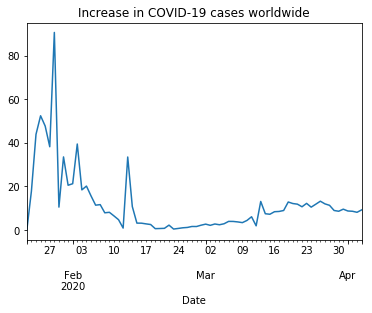

In [13]:
# plot increase rate
covid_data['Increase rate'].plot.line()
plt.title("Increase in COVID-19 cases worldwide")

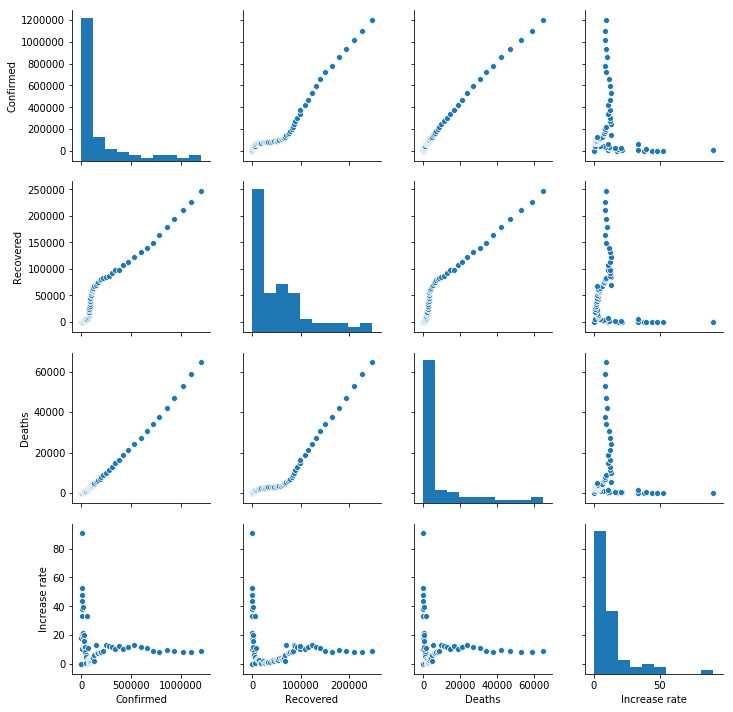

In [14]:
# Use seaborn pairplot to visualize correlations in covid-19 dataset
sns.pairplot(covid_data)

In [15]:
# just the numbers on how the variables correlate
covid_data.corr()

,Confirmed,Recovered,Deaths,Increase rate
Confirmed,1.000000,0.959665,0.996935,-0.137068
Recovered,0.959665,1.000000,0.946758,-0.216645
Deaths,0.996935,0.946758,1.000000,-0.110578
Increase rate,-0.137068,-0.216645,-0.110578,1.000000


In [16]:
# use highest corr var as X 
X = covid_data['Confirmed'].values.reshape(-1,1)
y = covid_data['Deaths'].values.reshape(-1,1)

In [17]:
# split the data 80% in train and 20% in test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [18]:
# check to make sure X and y have the same shape
X_train.shape, y_train.shape

((59, 1), (59, 1))

In [19]:
# fit regression model to training data
lr = LinearRegression().fit(X_train, y_train)

In [20]:
# display intercept and coef
print('intercept:', lr.intercept_, 'coef:', lr.coef_)

intercept: [-1472.86999016] coef: [[0.05179712]]


In [21]:
# now predict values of regression set 
y_pred = lr.predict(X_test)

In [22]:
# create and display a dataframe with actual and predicted numbers of deaths
df = pd.DataFrame({'Actual # of Deaths': y_test.flatten(), 'Predicted # of Deaths': y_pred.flatten()})
df

,Actual # of Deaths,Predicted # of Deaths
0,1013,742.078354
1,7905,8736.445490
2,259,-849.336288
3,46809,46833.380902
4,7126,7932.139847
5,1868,2321.683254
6,3085,3204.720515
7,2629,2648.160486
8,2708,2691.929050
9,14651,15980.324188


In [23]:
# now let's look at the error in this model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 557.6618826529826
Mean Squared Error: 518481.2260125318
Root Mean Squared Error: 720.0564047437755


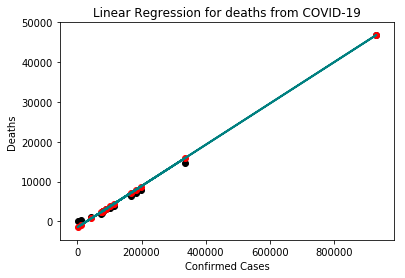

In [24]:
# linear regression line plot with test data
plt.scatter(X_test, y_test, color='black')
plt.scatter(X_test, y_pred,  color='red')
plt.plot(X_test, y_pred,  color='teal',linewidth=2)

plt.title('Linear Regression for deaths from COVID-19')  
plt.xlabel('Confirmed Cases')  
plt.ylabel('Deaths')

plt.show()

In [25]:
# Use score to get accuracy of model
score = lr.score(X_test, y_test)
print('Model accuracy score:', score)

Model accuracy score: 0.9959067699860005


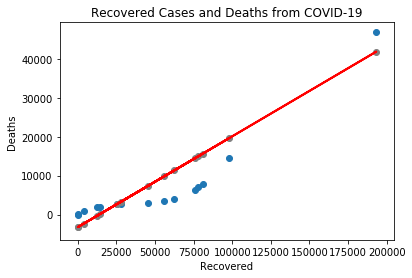

intercept: [-3228.05645069] coef: [[0.23321227]]
Mean Absolute Error: 4415.609969726408
Mean Squared Error: 26039406.211911775
Root Mean Squared Error: 5102.882147562471
Model accuracy score: 0.7944278911060396


In [26]:
# Now let's redraw the line for the second highest correlated var, Recovered
X = covid_data['Recovered'].values.reshape(-1,1)
y = covid_data['Deaths'].values.reshape(-1,1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

#from sklearn.linear_model import LogisticRegression
# fit regression model to training data
lr = LinearRegression().fit(X_train, y_train)

# now predict values of regression set 
y_pred = lr.predict(X_test)

# Display dataframe of actual and predicted # of deaths
df = pd.DataFrame({'Actual # of Deaths': y_test.flatten(), 'Predicted # of Deaths': y_pred.flatten()})
df

# linear regression line plot with test data
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, color='gray')
plt.plot(X_test, y_pred, color='red',linewidth=2)
plt.title('Recovered Cases and Deaths from COVID-19')  
plt.xlabel('Recovered')  
plt.ylabel('Deaths')  

plt.show()

# display intercept and coef
print('intercept:', lr.intercept_, 'coef:', lr.coef_)
#print()

# display error 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Use score to get accuracy of model
score = lr.score(X_test, y_test)
print('Model accuracy score:', score)

In [27]:
# check column titles
covid_data.columns

Index(['Confirmed', 'Recovered', 'Deaths', 'Increase rate'], dtype='object')

In [28]:
# Let's try to use the ARIMA and ARMA models
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [29]:
# a different way to set date to index
data = pd.read_csv('worldwide-aggregated.csv', index_col="Date")

# fill empty obs with zero
data = data.fillna(0)

# create a log of y
log_deaths = np.log(data['Deaths'])
log_recovered = np.log(data['Recovered'])
log_confirmed = np.log(covid_data['Confirmed'])

np.exp(log_deaths).head()

Date
2020-01-22    17.0
2020-01-23    18.0
2020-01-24    26.0
2020-01-25    42.0
2020-01-26    56.0
Name: Deaths, dtype: float64

In [38]:
# fit model
arma = ARMA(log_deaths, order=(2, 0, 3)).fit()
# make prediction
arma_y_pred = arma.predict()
# make dataframe with predicted and actual values
df = pd.DataFrame({'Predicted': np.exp(arma_y_pred), 'Actual': np.exp(log_deaths)})
# display last five
df[-5:]

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,Predicted,Actual
2020-03-31,40664.103275,42107.0
2020-04-01,45975.892020,46809.0
2020-04-02,50776.204354,52983.0
2020-04-03,58316.315645,58787.0
2020-04-04,63648.728608,64606.0


In [41]:
# get summary of model 
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Deaths   No. Observations:                   74
Model:                     ARMA(2, 0)   Log Likelihood                  72.775
Method:                       css-mle   S.D. of innovations              0.085
Date:                Sat, 04 Apr 2020   AIC                           -137.550
Time:                        22:51:09   BIC                           -128.334
Sample:                    01-22-2020   HQIC                          -133.874
                         - 04-04-2020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.2016      3.272      2.201      0.031       0.788      13.615
ar.L1.Deaths     1.8158      0.062     29.179      0.000       1.694       1.938
ar.L2.Deaths    -0.8173      0.063    -13.025      0.000      -0.940      -0.694
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0083           +0.0000j            1.0083            0.0000
AR.2            1.2135           +0.0000j            1.2135            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'COVID-19 deaths forecast')

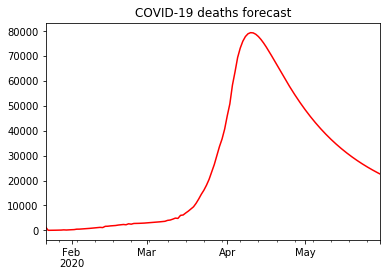

In [65]:
# forecast the number of deaths 
deaths_forecast = arma.predict(start='2020-01-22', end='2020-5-30')
# plot the forecast
np.exp(deaths_forecast).plot.line(color='red')
plt.title("COVID-19 deaths forecast")

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


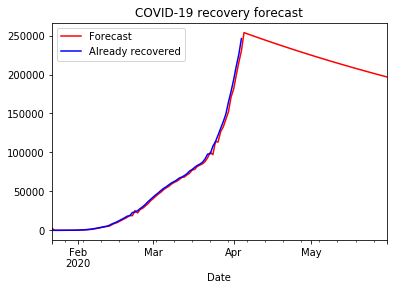

In [43]:
# fit model for recovery forecast
arma_recovered = ARMA(log_recovered, order=(1,1,0)).fit()
# make prediction
arma_y_pred = arma_recovered.predict()
# make dataframe with predicted and actual values
df = pd.DataFrame({'Predicted': np.exp(arma_y_pred), 'Actual': np.exp(log_recovered)})
# display last five
df[-5:]
# forecast the number of deaths 
recovered_forecast = arma_recovered.predict(start='2020-01-22', end='2020-5-30')
# plot
np.exp(recovered_forecast).plot.line(color='red', label='Forecast')
covid_data['Recovered'].plot(color='blue', label='Already recovered')
plt.title('COVID-19 recovery forecast')

plt.legend()

In [44]:
arma_recovered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Recovered   No. Observations:                   74
Model:                     ARMA(1, 1)   Log Likelihood                  40.246
Method:                       css-mle   S.D. of innovations              0.134
Date:                Sat, 04 Apr 2020   AIC                            -72.492
Time:                        22:51:24   BIC                            -63.275
Sample:                    01-22-2020   HQIC                           -68.815
                         - 04-04-2020                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.9609      4.364      1.824      0.072      -0.593      16.515
ar.L1.Recovered     0.9989      0.001    671.818      0.000       0.996       1.002
ma.L1.Recovered     0.5299      0.088      6.002      0.000       0.357       0.703
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           +0.0000j            1.0011            0.0000
MA.1           -1.8870           +0.0000j            1.8870            0.5000
-----------------------------------------------------------------------------
"""

In [56]:
# now let's do fit an arima model 
arima= ARIMA(log_deaths, order=(3,1,2)).fit() #random walk 
# make prediction
arima_y_pred = arima.predict()
# display table with predicted and actual values
df = pd.DataFrame({'ARIMA Predicted': np.exp(arima_y_pred), 'Actual': np.exp(log_deaths)})
df[-5:]

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,ARIMA Predicted,Actual
2020-03-31,1.108811,42107.0
2020-04-01,1.106124,46809.0
2020-04-02,1.124527,52983.0
2020-04-03,1.129472,58787.0
2020-04-04,1.114048,64606.0


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


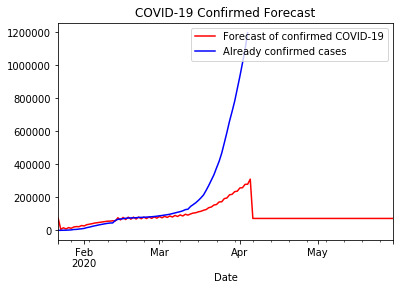

In [57]:
# forecast confirmed number of cases of covid-19
arma_confirmed = ARMA(log_confirmed, order=(0,1,1)).fit()
confirmed_forecast = arma_confirmed.predict(start='2020-01-22', end='2020-5-30')

# plot the forecast against the actual number of confirmed cases so far
np.exp(confirmed_forecast).plot.line(color='red', label='Forecast of confirmed COVID-19')
covid_data['Confirmed'].plot(color='blue', label='Already confirmed cases')
plt.title('COVID-19 Confirmed Forecast')

plt.legend()

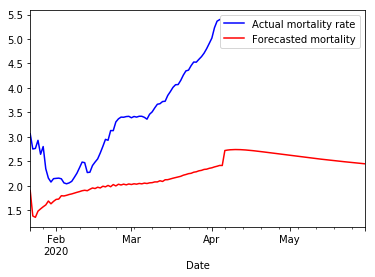

In [58]:
# plot current mortality rate plotted against the forecast
(covid_data['Deaths'] / covid_data['Confirmed']*100).plot.line(color='blue', label='Actual mortality rate' )
np.exp((deaths_forecast/confirmed_forecast)).plot.line(color='red', label='Forecasted mortality')

plt.legend()

In [59]:
# last 60 forecasted dates
np.exp(deaths_forecast)[:90]

2020-01-22     1341.595588
2020-01-23       17.059513
2020-01-24       18.979372
2020-01-25       35.316728
2020-01-26       62.467217
2020-01-27       71.170661
2020-01-28      112.444449
2020-01-29      192.760477
2020-01-30      135.110396
2020-01-31      210.618365
2020-02-01      255.561102
2020-02-02      304.607212
2020-02-03      476.839931
2020-02-04      487.433188
2020-02-05      554.271612
2020-02-06      631.395168
2020-02-07      698.373380
2020-02-08      797.586068
2020-02-09      885.519084
2020-02-10      997.441265
2020-02-11     1110.219025
2020-02-12     1202.340329
2020-02-13     1122.400435
2020-02-14     1619.681235
2020-02-15     1659.349913
2020-02-16     1792.219070
2020-02-17     1859.049078
2020-02-18     1951.168341
2020-02-19     2127.000087
2020-02-20     2219.381635
                  ...     
2020-03-22    14475.842075
2020-03-23    16126.169366
2020-03-24    18126.867346
2020-03-25    20479.806609
2020-03-26    23434.113931
2020-03-27    26409.026060
2

In [82]:
# find the max number of predicted deaths and on which day. 
for k, v in deaths_forecast.items():
    if np.exp(v) == np.exp(deaths_forecast).max():
        print(np.exp(v).round(), 'covid-19 deaths predicted to be reported on', k)

79377.0 covid-19 deaths predicted to be reported on 2020-04-10 00:00:00
